In [ ]:
import pandas as pd
file_path = "/content/air-quality-india.csv"
data = pd.read_csv(file_path)

print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe(include="all"))


Dataset Head:
             Timestamp  Year  Month  Day  Hour   PM2.5
0  2017-11-07 12:00:00  2017     11    7    12   64.51
1  2017-11-07 13:00:00  2017     11    7    13   69.95
2  2017-11-07 14:00:00  2017     11    7    14   92.79
3  2017-11-07 15:00:00  2017     11    7    15  109.66
4  2017-11-07 16:00:00  2017     11    7    16  116.50

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB
None

Dataset Description:
                  Timestamp          Year         Month           Day  \
count                 36192  36192.000000  36192.00

In [ ]:
print(data.columns)

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')


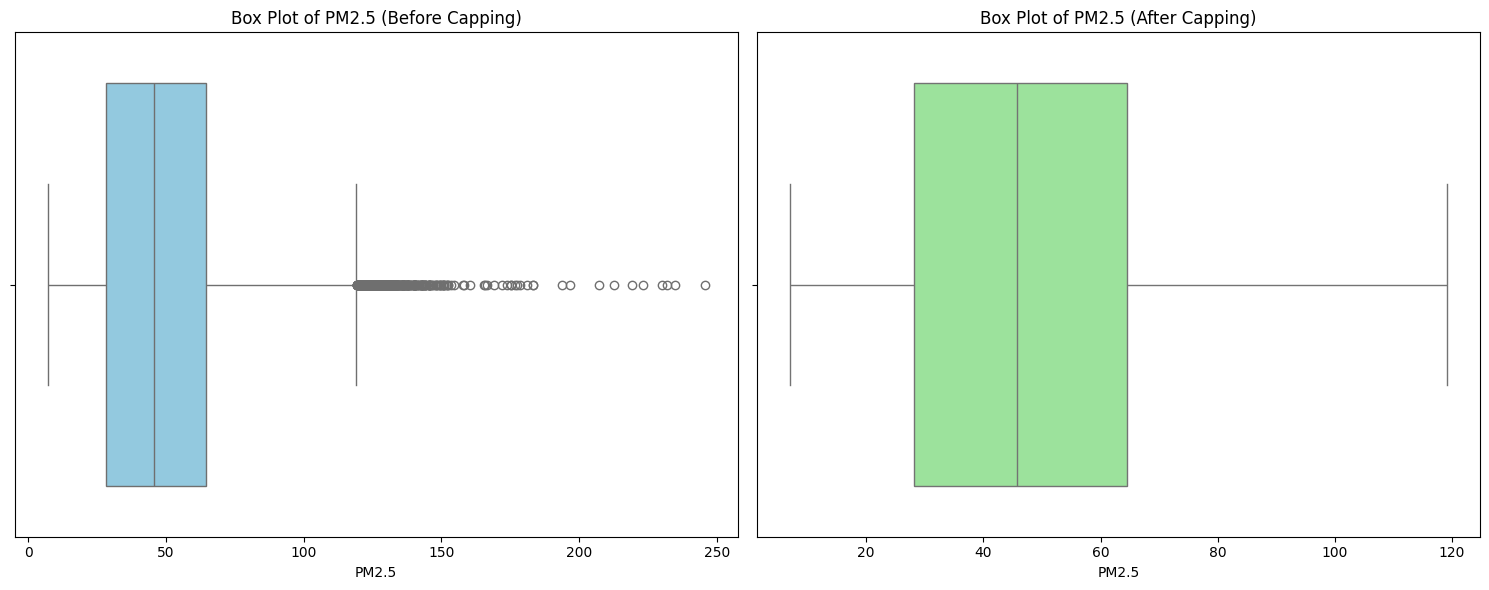

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data_uncapped = data.copy()
Q1 = data_uncapped['PM2.5'].quantile(0.25)
Q3 = data_uncapped['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
data_capped = data.copy()
data_capped['PM2.5'] = data_capped['PM2.5'].clip(upper=upper_bound)
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data_uncapped['PM2.5'], color="skyblue")
plt.title("Box Plot of PM2.5 (Before Capping)")
plt.xlabel("PM2.5")

plt.subplot(1, 2, 2)
sns.boxplot(x=data_capped['PM2.5'], color="lightgreen")
plt.title("Box Plot of PM2.5 (After Capping)")
plt.xlabel("PM2.5")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.drop(columns=['PM2.5', 'Timestamp'])
y = data['PM2.5']


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import numpy as np
print("Mean of scaled training data:", np.mean(X_train_scaled, axis=0))
print("Standard Deviation of scaled training data:", np.std(X_train_scaled, axis=0))

Mean of scaled training data: [ 1.92285582e-14  3.48485713e-17 -6.13531185e-18  5.22115038e-17]
Standard Deviation of scaled training data: [1. 1. 1. 1.]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mape = mean_absolute_percentage_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAPE: {rf_mape}")
print(f"Random Forest R2: {rf_r2}")


Random Forest RMSE: 4.669995769618712
Random Forest MAPE: 0.055746552577329744
Random Forest R2: 0.9645872568105871


In [ ]:
import xgboost as xgb
# XGBoost Regressor Model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAPE: {xgb_mape}")
print(f"XGBoost R2: {xgb_r2}")


XGBoost RMSE: 6.701085121610473
XGBoost MAPE: 0.09239515713872928
XGBoost R2: 0.9270850025425095


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from statsmodels.tsa.arima.model import ARIMA
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)
y_pred_lstm = lstm_model.predict(X_test_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
lstm_mape = mean_absolute_percentage_error(y_test, y_pred_lstm)
lstm_r2 = r2_score(y_test, y_pred_lstm)

print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAPE: {lstm_mape}")
print(f"LSTM R2: {lstm_r2}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2680.8545
Epoch 2/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 848.9437
Epoch 3/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 598.9969
Epoch 4/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 594.8624
Epoch 5/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 587.5369
Epoch 6/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 591.0489
Epoch 7/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 579.8050
Epoch 8/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 583.4357
Epoch 9/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 580.7844
Epoch 10/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 589.6985
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM RMSE: 24.191090549999675
LSTM MAPE: 0.5387867807140133
LSTM R2: 0.049750849968850264


In [ ]:

results = {
    'Model': ['RandomForest', 'XGBoost', 'LSTM'],
    'RMSE': [rf_rmse, xgb_rmse, lstm_rmse],
    'MAPE': [rf_mape, xgb_mape, lstm_mape],
    'R2': [rf_r2, xgb_r2, lstm_r2]
}

results_df = pd.DataFrame(results)
print(results_df)

best_model_index = results_df['R2'].idxmax()
best_model = results_df.iloc[best_model_index]
print(f"Best model is: {best_model['Model']} with R2: {best_model['R2']}")


          Model       RMSE      MAPE        R2
0  RandomForest   4.669996  0.055747  0.964587
1       XGBoost   6.701085  0.092395  0.927085
2          LSTM  24.191091  0.538787  0.049751
Best model is: RandomForest with R2: 0.9645872568105871


In [ ]:
# Define air quality category based on PM2.5 values
def categorize_air_quality(pm_value):
    if pm_value <= 50:
        return 'Good'
    elif pm_value <= 100:
        return 'Medium'
    else:
        return 'Harmful'

y_pred_categorized = [categorize_air_quality(pred) for pred in y_pred_rf]

for idx, category in enumerate(y_pred_categorized[:10]):
    print(f"Prediction {idx + 1}: Air Quality is {category}")


Prediction 1: Air Quality is Medium
Prediction 2: Air Quality is Medium
Prediction 3: Air Quality is Medium
Prediction 4: Air Quality is Good
Prediction 5: Air Quality is Good
Prediction 6: Air Quality is Medium
Prediction 7: Air Quality is Medium
Prediction 8: Air Quality is Medium
Prediction 9: Air Quality is Good
Prediction 10: Air Quality is Good


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Predict on training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate training data performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate test data performance
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print(f"Training RMSE: {train_rmse}, Training MAPE: {train_mape}, Training R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test MAPE: {test_mape}, Test R2: {test_r2}")

# Check for overfitting/underfitting
if train_r2 > test_r2:
    print("Model may be overfitting.")
elif train_r2 < test_r2:
    print("Model may be underfitting.")
else:
    print("Model is performing well, not showing overfitting or underfitting.")


Training RMSE: 28.726614310424292, Training MAPE: 0.7726721806531246, Training R2: -0.3338622365016939
Test RMSE: 29.0331682022756, Test MAPE: 0.7893654086849671, Test R2: -0.3687226558523813
Model may be overfitting.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
best_rf_mape = mean_absolute_percentage_error(y_test, y_pred_best_rf)
best_rf_r2 = r2_score(y_test, y_pred_best_rf)

print(f"Best RandomForest RMSE: {best_rf_rmse}")
print(f"Best RandomForest MAPE: {best_rf_mape}")
print(f"Best RandomForest R2: {best_rf_r2}")


Best RandomForest RMSE: 4.682335766368189
Best RandomForest MAPE: 0.05580645816571686
Best RandomForest R2: 0.9643998602848678


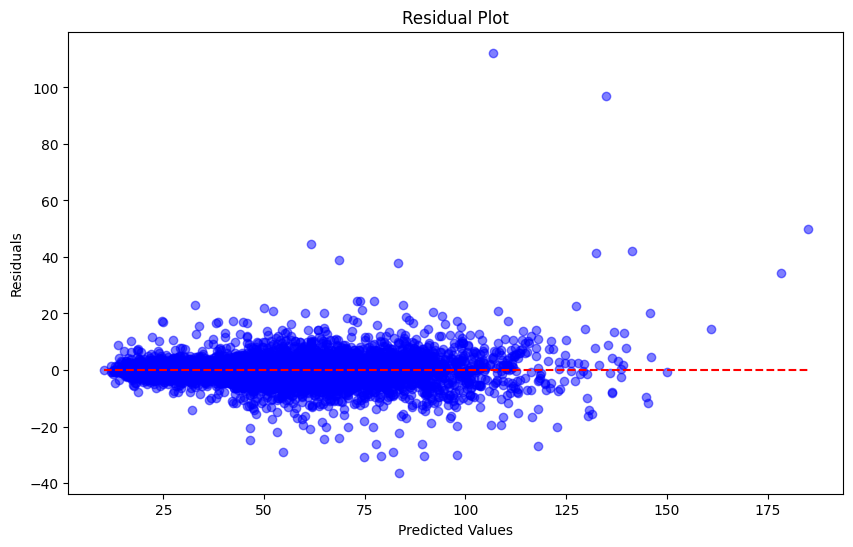

In [ ]:
# Residual plot
residuals = y_test - y_pred_best_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_rf, residuals, color='blue', alpha=0.5)
plt.hlines(0, min(y_pred_best_rf), max(y_pred_best_rf), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


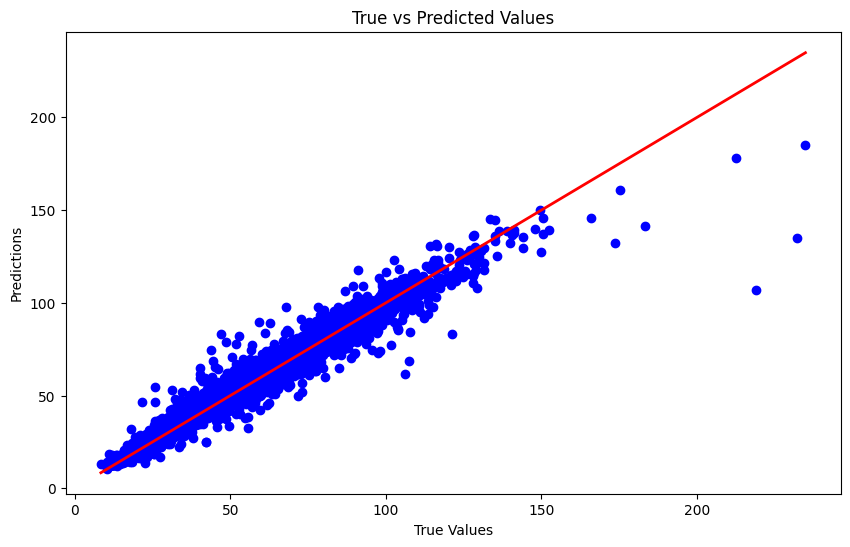

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


In [ ]:
# Training performance
y_pred_train = best_rf_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Test performance
y_pred_test = best_rf_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training MAPE: {train_mape}, Test MAPE: {test_mape}")
print(f"Training R2: {train_r2}, Test R2: {test_r2}")


Training RMSE: 1.7716018687136283, Test RMSE: 4.682335766368189
Training MAPE: 0.020863276876754027, Test MAPE: 0.05580645816571686
Training R2: 0.9949268891769111, Test R2: 0.9643998602848678


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Cross-validation to check for consistency
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE: {np.mean(np.sqrt(-cv_scores))}")


Cross-validated RMSE: 5.143904159293289


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validate the R2 score
cv_r2_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R2 scores: {cv_r2_scores}")
print(f"Mean Cross-validated R2: {np.mean(cv_r2_scores)}")


Cross-validated R2 scores: [0.95726045 0.95550778 0.95785899 0.95523394 0.96020569]
Mean Cross-validated R2: 0.9572133693755938


In [ ]:
for idx, category in enumerate(y_pred_categorized[:10]):
    print(f"Prediction {idx + 1}: Air Quality is {category}")

Prediction 1: Air Quality is Medium
Prediction 2: Air Quality is Medium
Prediction 3: Air Quality is Medium
Prediction 4: Air Quality is Good
Prediction 5: Air Quality is Good
Prediction 6: Air Quality is Medium
Prediction 7: Air Quality is Medium
Prediction 8: Air Quality is Medium
Prediction 9: Air Quality is Good
Prediction 10: Air Quality is Good
